<a href="https://colab.research.google.com/github/boryslawskamaria/ML_scripts/blob/main/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comparison of two logistic regression models using the iris dataset (descriptive data) 

---

1.   The first model is based on the first three descriptive variables 
2.   The second model is based on the first four descriptive variables 
3.   The table "True / False, Positive / Negative" for the models made is presented. 
4.  Sensitivity, specificity, positive predictive value and F1 value are calculated.    
 


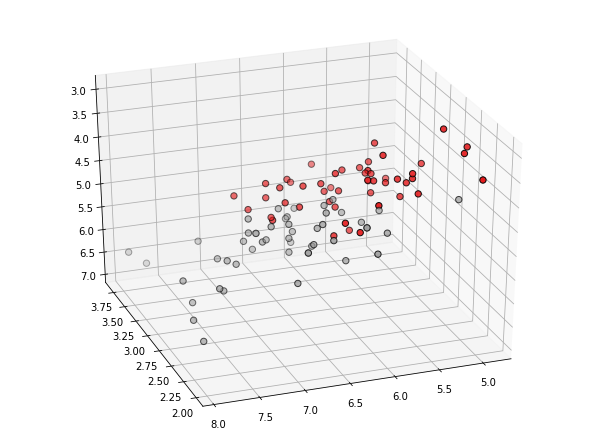

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, linear_model


iris = datasets.load_iris()


x = iris.data[iris.target!=0]
y = iris.target[iris.target!=0]

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)

In [2]:
A=linear_model.LogisticRegression(C=10000)
A.fit(x[:,0:3], y)

p=A.predict(x[:,0:3])
print(A.coef_, A.intercept_)
xx=np.arange(4.5,8.5,0.1)
yy=np.arange(1,5,0.1)
xx, yy = np.meshgrid(xx, yy)
c=A.coef_[0][2]
z=-xx*A.coef_[0][0]/c-yy*A.coef_[0][1]/c-A.intercept_[0]/c
ax.plot_surface(xx, yy, z, alpha=0.3)
plt.show()



[[-3.84479447 -0.63994262 13.12555689]] [-38.15217783]


In [3]:
X1=np.bincount(p[0:50]==1)
X2=np.bincount(p[50:100]==2)
TP=X1[1]
FP=X2[1]
FN=X1[0]
TN=X2[0]
print (TN, TP, FN, TN)


sensitivity=TP/(TP+FN)
ppv=TP/(TP+TN)
specificity=FP/(TN+FP)
f1= 2*sensitivity*ppv/(sensitivity+ppv)

print(sensitivity, ppv, specificity, f1)

2 47 3 2
0.94 0.9591836734693877 0.96 0.9494949494949495


In [4]:
B=linear_model.LogisticRegression(C=10000)
B.fit(x[:,0:4], y)
p=B.predict(x[:,0:4])
print(A.coef_, A.intercept_)


X1=np.bincount(p[0:50]==1)
X2=np.bincount(p[50:100]==2)
TP=X1[1]
FP=X2[1]
FN=X1[0]
TN=X2[0]
print (TN, TP, FN, TN)


sensitivity=TP/(TP+FN)
ppv=TP/(TP+TN)
specificity=FP/(TN+FP)
f1= 2*sensitivity*ppv/(sensitivity+ppv)

print(sensitivity, ppv, specificity, f1)

[[-3.84479447 -0.63994262 13.12555689]] [-38.15217783]
1 49 1 1
0.98 0.98 0.98 0.98
